In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#Q1. Execute the following statement. What is displayed? What does it mean?
!pwd
# we can get the directory where we are working on.
# if run the code, we will get /content

/content


In [ ]:
#Q2: Execute the following statement. What happens?  Examine the left column of your colab page to see what happens.
!git clone https://github.com/fastai/course-v3.git
# we can get the whole files at github with url. Then new folder that is course-v3 appeared in our directory 
# It is child directory of our current directory which could be known by !pwd.

fatal: destination path 'course-v3' already exists and is not an empty directory.


In [ ]:
#export
#Q3a: Execute the following statement. Read the error message. Explain what it means. 

# if we want to use the packages or python file, it should be in the sys.path directory or current directory
# but in those area, there is no exp because we don't register the the path where exp really exists
# That's why error comes up.

ModuleNotFoundError: ignored

In [ ]:
#Q3b. You can solve the problem by executing the following statement before the above statement. 
# Explain why the following statements can solve this "module not found" problem. 
# ----
#
# sys.path shows us paths where our python package exists and then we can add a the specific path where exp exists by sys.append
# Because we add the path where exp exists, python system can now find the exp in added path directory. 
# That's why following statements solve the module not found.

In [ ]:
import sys
sys.path.append('/content/course-v3/nbs/dl2/')
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/course-v3/nbs/dl2',
 '/content/course-v3/nbs/dl2',
 '/content/course-v3/nbs/dl2/']

In [ ]:
import torch.nn.functional as F
from exp.nb_02 import *


## Initial setup

### Data

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=1786)

In [ ]:
from IPython.display import Image
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

def get_data():
    import os
    import torchvision.datasets as datasets
    root = '../data'
    if not os.path.exists(root):
        os.mkdir(root)

    train_set = datasets.MNIST(root=root, train=True, download=True)
    test_set = datasets.MNIST(root=root, train=False, download=True) #load validation set
    x_train, x_valid = train_set.data.split([50000, 10000])
    y_train, y_valid = train_set.targets.split([50000, 10000])
    return (x_train.view(50000, -1) / 256.0), y_train.float(), (x_valid.view(10000, -1))/ 256.0, y_valid.float()



In [ ]:
#mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
#Q4: when you execute the following statement, where is the downloaded data stored? Examine the left column of your colab page.
x_train,y_train,x_valid,y_valid = get_data()
##  if we download, they are stored in the path which we specified "../data"
## .. means parent-directory. we know that we are in /content now by using !pwd. 
# if we use '..', python go up to parent directory which is '/' then make the data directory and finally save the datas in that directory
## so our data is saved in /data directory.

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#Q5a: Execute the following statement. What does the number displayed mean?
len(x_train)
# we can get the number of data samples which is first shape of x_train
# we have 50000 images

50000

In [ ]:
#Q5b: Execute the following statement. What do the numbers displayed refer to?
x_train[0]
# those numbers refer to the pixel color brightness in gray scale.
# the image consists of 784 pixels,that is 28*28, and each pixel have color information.

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
#Q5c: Execute the following statement. What do the numbers displayed refer to?
y_train[0]
# we can get the first image's label which is the answer for the image.
# To know why it is 5, mnists dataset's answers consist of 0~9, digit number. And the first image represents 5.
# thats why it is 5.

tensor(5.)

In [ ]:
#Q5d. Execute the following statement. What does the number displayed refer to? 
x_train[0].shape
# it means, the number of features(or elements) of each image.
# for one image, there are 784 elements.

torch.Size([784])

In [ ]:
#Q5e. Execute the following statement. What do the numbers displayed refer to?
x_train.shape
# we have 50000 images and 784 pixel values for each image.

torch.Size([50000, 784])

In [ ]:
#Q5f. Execute the following statement. What do the numbers displayed refer to?
y_train.shape
# we have 50000 ground truths which are corresponding to 50000 image each.

torch.Size([50000])

In [ ]:
#Q6: Display the values of n,m, c, and nh. What are they? For what are they used in the following code? 
n,m = x_train.shape
c = y_train.max()+1
nh = 50
# if we have neural net consisting of layer1,layer2
# n is the number of feature of each sample which is used for layer1 weight matrix multiplication which is 784 ( 50000*784 @ 784*50)
# m is the number of samples, and its dimension,50000, will kept throughout the whole neural net layers ( 50000*784 @ 784*50) -> (50000*50 @ 50*10)
# nh is the number of hidden nodes for each sample which is 50
# c is the number of the kind of labels,10, which we want to predict. It is the output number of layer2's node for each sample which is 10 (50000*10)

NameError: ignored

In [ ]:
#The following defines Model class, which will be used to create a neural net.
#Q7a: nn.Module is the parent class of class Model. Why do you want to make Model a child class to its parent nn.Module, rather than making Model stand on its own?
#Q7b. See the definition of self.layers field. It contains nn.Linear(n_in,nh). What is the difference between nn.Linear class nn.Linear(n_in,nh)? 
#Q7c. Would you think that the weight and bias parameters of the two linear layers are initialized when object nn.Linear(n_in,nh) is constructed? If so, guess why.
from torch import nn
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x
#a
# nn.Module is the basic neural net module like a basket. After adding layers to that module, we can construct the neural net
# nn.Module encapsulate the parmeters, helping to use gpus,exporting,loading etc like a helper for making model class
# We often inherit this module when we make model class
# Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes
#b
# nn.Linear is class itself while nn.Linear(n_in,nh) means initializing the class to instance. It executes __init__ with parameters.
#c
# yes, when we should construct the weight and bias parameters, we need outer information with __init__ parameters
# for example weight initialization needs the numbers to make size of dimension. for weight, (n_in *nh) size


In [ ]:
#Q8. When the following statement is executed, what happens? Explain by referring to a method in class Model.
model = Model(m, nh, 10)
# If we initialize the class, __init__ function will be executed.
# In general, they declare the variables with parameters and make layers using parameters
# we can assign the three layers to class.layers with n_in,nh,n_out
# also we can set the basic things by __init__ inherited from nn.Module.

In [ ]:
#Q9a. When the following statement is executed, what happens? Explain by referring to a method in class Model. 
#Q9b. Draw a diagram or a graph by using arrows and boxes, which shows what computation is performed when model(x_train) is executed.
pred = model(x_train)
#a
# After we initialize the class, we can also execute the instance with parameters using __call__ function
# In nerual net model, we often predict the result with train data input using __call__ function
# Here, when we put the x_train data in __call__ function, x_train go through all layers and make prediction which is final output
#b
# 50000,784 -> linear(xW+b) -> 50000 * 50 -> activation(max(0,x)) function -> 50000 * 50 -> linear(xW_2+b_2) -> 50000 * 10

In [ ]:
#Q10: Execute the following statement. What do the 10 displayed numbers refer to?
pred[0]
# pred[0] means the degree of being 10 label each for first data sample. In general, we select the prediction label with biggest number( 0.0901)
# Because we have 10 labels, there are also 10 numbers.
# for example, pred[0][0](-0.0841) means how much it is likely to be the label 0.
# remember it is not proability and just weight.

tensor([-0.1731,  0.0460, -0.0034, -0.0246,  0.2060, -0.1380,  0.0344,  0.0863,
         0.0132, -0.2229], grad_fn=<SelectBackward>)

In [ ]:
#Q11. Execute the following statement. Is the resulting value near to 1? If not, what does it imply?
pred[0].sum()
# Of course not, it is just likely weight for each label, not the proability.
# So if we want to apply statstic proability concept for predicting label, we need to convert sum of elements to 1

tensor(-0.1761, grad_fn=<SumBackward0>)

### Softmax function

First, we will need to compute the softmax of our activations. This is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

In practice, we will need the log of the softmax when we calculate the loss.

In [ ]:
def softmax(x): return (x.exp()/(x.exp().sum(-1,keepdim=True)))

In [ ]:
sm_pred = softmax(pred)


In [ ]:
#Q12. Execute the following statement. What do the 10 displayed numbers refer to?
sm_pred[0]
# each number means probability of each label being the answer.
# for exmaple, if sm_pred[0][0] is 0.3, the proability of being 0 for image is 30%
# Also their number arranges from 0 ~ 1 which is Probabilistic interval

tensor([0.0850, 0.1058, 0.1007, 0.0986, 0.1241, 0.0880, 0.1046, 0.1101, 0.1024,
        0.0808], grad_fn=<SelectBackward>)

In [ ]:
#Q13. Execute the following statement. What does the displayed numbers mean?
sm_pred[0].sum()
# this should be 1 if it is subordinate to the probability. One of the probaility's property is that sum all values  is 1.
# this means each number gives us the information about how much probable each label would be the answer.

tensor(1., grad_fn=<SumBackward0>)

## Log softmax

In [ ]:
def log_softmax(x): return (x.exp()/(x.exp().sum(-1,keepdim=True))).log()

In [ ]:
log_sm_pred = log_softmax(pred)

In [ ]:
log_sm_pred[0]

tensor([-2.4656, -2.2465, -2.2958, -2.3170, -2.0864, -2.4304, -2.2580, -2.2061,
        -2.2792, -2.5153], grad_fn=<SelectBackward>)



## Cross Entropy Loss Function.
 Read the following paragraph to understand what the cross entroy loss functioni is. 

The difference between  two probabilities: 
 https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

The cross entropy formula takes in two distributions,  $p(x^{(s)})$, the true distribution (defined by the label data), and $\hat{p}(x^{(s)})$, the estimated distribution (predicted by the neural net), defined over the discrete variable $x^{(s)}$  and is given by

$H(p,\hat{p})=−\sum_{s \in B} p(x^{(s)}) \cdot log(\hat{p}(x^{(s)}))$


In general, $ p(x^{(s)}) = [ p_{1} (x^{(s)}), ..., p_{n}(x^{(s)})]$ is a probability distribution over a set of categories. 
But since our $ p(x^{(s)})$ are 1-hot encoded, that is, in the form of  $ p(x^{(s)}) =[0,0,..,0,1,0..]$, where the probability of only one category is one and those of the other categories are all zero, this can be rewritten as

 \begin{equation}
 H(p,\hat{p})= -\sum_{s \in B} [ 0*\log(\hat{p}_{1} (x^{(s)}))  
 + 1*\log(\hat{p}_{i} (x^{(s)}) ) +..+
 0* \log( \hat{p}_{n} (x^{(s)}) ) ] \\ 
  = -\sum_{s \in B} \log(\hat{p}_{i(s)} ) (x^{(s)}) ) 
  \tag{crossEntroyEq}
 \end{equation}
 
 Te softmax function plays the role of the probability distribution $\hat{p}_{1} (x^{(s)})$.

  Here $i(s)$ is the index of the one-hot  probability distribution $p(x^{(s)})$ where the probability is one. 
 
 

# integer array indexing 

In [ ]:
#Q14a.  Execute the following statement. What is the role of list [0,1,2] in the statement?  What do the displayed numbers refer to? 
log_sm_pred[ [0,1,2]]
# The role of list [0,1,2] is to extract the 0th,1th,2th vector(sample) from whole output
# each element of those three vector represents the log_softmax values between -infinity and 0
# if there is highest value, model think that the label of highest value would be the answer.
# Becuase there are 10 kinds of answers, there are 10 elements for each vector for 0,1,2.
# It is calculated by softmax and log.
# First we calcuate probability of each label using softmax, then we apply the log 
# why we use log is to get benefit from caculation in proability multiplication and at the same time
# it makes more penalty on big loss than softmax which makes the model training efficient.

tensor([[-2.4656, -2.2465, -2.2958, -2.3170, -2.0864, -2.4304, -2.2580, -2.2061,
         -2.2792, -2.5153],
        [-2.5745, -2.2436, -2.3859, -2.3912, -2.0901, -2.3638, -2.3008, -2.1226,
         -2.2519, -2.3927],
        [-2.3427, -2.1785, -2.3696, -2.3438, -1.9762, -2.3294, -2.4005, -2.3111,
         -2.3806, -2.4893]], grad_fn=<IndexBackward>)

In [ ]:
#Q14b.  Execute the following statement. What is the role of list [2,4,6] in the statement?  What do the displayed numbers mean? Explain compare the result of Q15b and the result of this statement.
log_sm_pred[[0,1,2], [2,4,6]]
# the role of list [2,4,6] is to extract log_softmax value of the ground truth index for each vector.
# log_sm_pred[0,2] means how much first sample data is likely to be 2 and log_smpred[1,4] means how much second sample data is likely to be 4 and so forth each.
# ideal number of each element is close to -inf except ground truth label, because log(0) = -inf
# If the number is not closest to 0, we need to train more until the ground truth index's prediction value becomes higher
#
# If we calcuate the loss with 14a, lots of computing resources are wasted. Because all probabilities, except the answer, become 0 in one-hot ground truth data, we don't
# need the other numbers. For example, if we calcuate the loss of first sample(log_sm_pred[0]) with y_train[0](suppose one-hot vector) using cross_entropy loss,
#we need only log_sm_red[0][5],where answer is 5, not the whole vector output of first sample. Since, any number multiplying with 0 becomes 0.
# So to be efficient loss calculation with cross_entropy, 14b is desirable.

tensor([-2.2958, -2.0901, -2.4005], grad_fn=<IndexBackward>)

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2081)

In [ ]:
range(y_train.long().shape[0])

range(0, 50000)

In [ ]:
selectOneHot = log_sm_pred[ range(y_train.long().shape[0]), y_train.long() ]

In [ ]:
selectOneHot.shape

torch.Size([50000])

In [ ]:
selectOneHot

tensor([-2.4304, -2.5745, -1.9762,  ..., -2.3435, -2.0935, -2.3055],
       grad_fn=<IndexBackward>)

In [ ]:
#Q15.  What does selectOneHot refer to?
# it selects the log probability of ground truth's element for each sample from log_sm_pred
# for example, first image's answer is 5. so select the 5th number for first image(log_sm_pred[0,5]) and other images does same process.
# In conclusion, it contains the log probability values for each sample to get the right answer. we expect those values would be near 0.

In [ ]:
def nll(input, target):
   
   return -input[range(target.shape[0]), target].mean()

In [ ]:
y_train.long().shape[0]

50000

In [ ]:
#Q16. Read nill function and explain how this function computes the result. You need to refer to {CrossEntropyLoss}.
loss = nll(log_sm_pred, y_train.long())
# first we infer the log proability of each label for each image using log_softmax from output layer.
# then using crossentropy loss, we calculate the loss between each sample's prediction and true answers. Then we get the average of total datas' loss
# if we calculate crossentropy loss, we only use the logsoftmax value on answer label to save resources as I mentioned above.
# since,except the answer's index's value of answer-one hot encoding vector, they are all zero which are used to mulitply with output of model.

In [ ]:
loss

tensor(2.3240, grad_fn=<NegBackward>)

In [ ]:
#Q16. Compare function nll() and the formula CrossEntropyEq. Explain that function nll() computes the cross entropy function between
# predicted probability distrubution of the input images and the ground truth (labeled) probability distribution of the input images. 
test_near(F.cross_entropy(pred, y_train.long()), loss)
# if executing, we find that they are same.
# In PyTorch, log_softmax and nll_loss are combined in one optimized function, F.cross_entropy.
# as you see below, we convert the values into probability range 0 ~ 1 by using softmax
# softmax is exp(x_i) / sum of all exp(x_{})
# Then we calculate the loss between prediction and loss using cross-entropy loss
# In the case of cross-entropy loss for one data sample is p(y)*log(p(y_hat) where y is [0,0,0,...1,0,0] format and y_hat is [v1,v,2,v3,....,v10] format
# The only thing we need is 1 *log(v8). For calculation efficiency, we select answer index's value for y revealing 1 and same index for y_hat


## Basic training loop

Basically the training loop repeats over the following steps:
- get the output of the model on a batch of inputs
- compare the output to the labels we have and compute a loss
- calculate the gradients of the loss with respect to every parameter of the model
- update said parameters with those gradients to make them a little bit better

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2542)

In [ ]:
loss_func = F.cross_entropy # This built-in Pytorch function  combines log_softmax and nll in a single function.
# In the following code, we will use this function, not the function nll defined above.

In [ ]:
#export
def accuracy(out, yb): return (torch.argmax(out, dim=1)==yb).float().mean()

In [ ]:
bs=1000                  # batch size

xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
preds[0], preds.shape
print(preds[0])
#Q17. What does preds[0] refer to?
# it means prediction for the first data sample. Each element means likey to belong to each index and the largest number will be the predicted as answer.

tensor([ 1.6429, -4.2640, -0.1881,  4.0876, -6.1015,  5.5995, -1.8717, -0.1294,
         1.9622, -0.9064], grad_fn=<SelectBackward>)


In [ ]:
yb = y_train[0:bs]
loss = loss_func(preds, yb.long())
loss
#Q18. What does the value of loss refer to?
# it means how much the model makes errors using crossEntropy. Near 0 would be pursued

tensor(2.3234, grad_fn=<NllLossBackward>)

In [ ]:
accuracy(preds, yb)
#Q19. What does  the value of the above statement refer to? Examine the value. Is it supposed to be equal to one approximately?
# If it is not at the current moment, what is the reason for it?

# It represents whether model prediction is same with the true answer or not, that is model accuracy.
# idealy, we want accuracy to be 1 but it is not 1 now. 7 % is too low to use.
# Because we didn't do enough training loop for finding best parameters called optimizing process to predict accurately,
# We need to try more training.
# So it implies that we need to make model do more training. And the model is not good enough to use yet.

tensor(0.0700)

# The mechanism for training the network: 

(1) computing the graidents of Loss with respect to tensors at each layer, (2) backpropgation: applying the chain rule to compute the gradient vector of the parameters, (3) updating the parameters.

https://github.com/pytorch/pytorch/blob/35bd2b3c8b64d594d85fc740e94c30aa67892a34/torch/tensor.py

https://github.com/pytorch/pytorch/blob/35bd2b3c8b64d594d85fc740e94c30aa67892a34/torch/tensor.py

https://stackoverflow.com/questions/57248777/backward-function-in-pytorch


In [ ]:
lr = 0.5   # learning rate
epochs = 2 # how many epochs to train for

In [ ]:
#Q20. What does the number  (n-1)//bs + 1 refer to?
# it refers how many we have the mini-batch. For example, if we set bs=32 and whole data is 100, we have 4 mini-batch.
# so if we have 10 batch sizes it become range(10), And why (n-1 and + 1) is ? It is to prevent batch size zero due to '//' calculation.
# even though the (n-1)//bs = 0, some number of data under the batch size still left and we should train those data.
# For example there are 15 data left and batch size is 32. Despite 15//32 == 0, we need to train those data that's why we set (n-1)//bs + 1
import pdb
for epoch in range(epochs):
    for i in range((n-1)//bs + 1): # for each batch in the current epoch
#       pdb.set_trace()
        start_i = i*bs
        end_i = start_i+bs

        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]


        ybHat = model(xb)
        #h = ybHat.register_hook( lambda grad: print (grad) )

        loss = loss_func( ybHat, yb.long())        

        #ybHat.grad
        loss.backward() # When you call loss.backward(), all it does is compute gradient of loss 
                        # w.r.t all the parameters in loss that have requires_grad = True and store them in parameter.grad attribute for every parameter

        #ybHat.grad                
        #The following performs what Pytorch function optimizer.step() does:
        # It updates all the weight and bias parameters based on the gradients of loss with respect to the weight and bias parameter 
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad   * lr

                    #
                    # loss.backward() computes the gradient of loss w.r.t. graph LEAVES.
                    #  This function accumulates gradients in the leaves - you might need to zero
                    # we don't care about gradients from the previous batch.
                    # Not zeroing grads would lead to gradient accumulation across batches
                    l.weight.grad.zero_()
                    l.bias.grad.zero_()

       #Q21:  print the loss and the accuracy after training the net using the validation dataset.
       #      Explain how the loss and accuracy change as each batch is used  for training the network model.
       #      Try to convey detailed and specific information about the progress of training the neural net.
       #      Observe the printed data carefully
       #--
        #loss and accuracy should be changed because we are doing mini-batch training !
        # we update the parameters such as w,b with gradient descent for each batch loop.
        # the loss and accuracy might be fluctuated but in the whole aspect of training, loss Continuously go down and accuracy persistantly goes up.
        # Its process is a way of finding optimal parameters. At a certain moment, the number of loss and accuracy would be converged around certain number,
        #for example if 0.3004 for epoch1 and the this number doesn't change much in more training, we can know that model might be in the optimal status)
        # But, after many traning this value there is a chance to escape the local optima which we considered as real opimal, 
        # so we should do lots of shoots to find real optimal status not stop at early time.



       #Q22. Explain why you would use validation dataset to check the progress of learning of your network.
        # Because we don't want the model overfitting, we should test the model with new datas preventing too "local".
        # Overfitting means that the model is only fitable for the train data set, not the new data set.
        # In the real world there is lots of deviation or errors(alpha) for data. However if we use overfitted model, 
        # this small errors make huge impact on the model only to make wrong prediction. That is, we need to make model generalize.
        # The way We can check the degree of overfitting is to use new data, which is validation data, persistantly for the training model
        # not to be overfitted for train dataset.
        
        yHatValid = model(x_valid)
        lossValid = loss_func( yHatValid, y_valid.long() )        

        
        print('epoch={0}, batch ={1}:'.format(epoch, i) )  
        print('  lossValid=', lossValid )
        print('  accuracyValid = ', accuracy( yHatValid, y_valid) )

    #Q23. Afer each epoch, print the loss and the accuracy of the network by using the training dataset. 
    #     Explain the result. Be attentive to the result.   
    # it might be fluctuated in mini-batch training but
    # the loss of the network steadily down for training loop(0.49 -> 0.33), and the accuracy becomes higher than before.(0.84->0.9)
    # It means our model training do it with right way. Not wrong structured model.
#     epoch={0}: 0
#   lossTrain= tensor(0.4975, grad_fn=<NllLossBackward>)
#   accuracyTrain =  tensor(0.8412)
#     epoch={0}: 1
#   lossTrain= tensor(0.3390, grad_fn=<NllLossBackward>)
#   accuracyTrain =  tensor(0.9012)


    yHatTrain = model(x_train)
    lossTrain = loss_func( yHatTrain, y_train.long() )        

    print('*******************************************************')    
    print('epoch={0}:', epoch )  
    print('  lossTrain=', lossTrain)
    print('  accuracyTrain = ', accuracy( yHatTrain, y_train) )

    #Q24. Afer each epoch, print the loss and the accuracy of the network by using the validatio  dataset. 
    #     Explain the result. Be attentive to the result.   
    # The validation's loss also steadily go down and the accuracy steadily goes up.
    # To sum up the information of validation and training result, the model training goes in reasonable way.
    # Since, if trainloss goes down and validation loss goes up, it signifies the chance of overfitting.
    # Or if trainloss goes up and validation loss goes up together, it signifies the chance of the training too much or we made wrong structure model.
#     epoch={0}: 0
#   lossValid  tensor(0.4490, grad_fn=<NllLossBackward>)
#   accuracyValid =  tensor(0.8627)

#     epoch={0}: 1
#   lossValid  tensor(0.3103, grad_fn=<NllLossBackward>)
#   accuracyValid =  tensor(0.9123)
    yHatValid = model(x_valid)
    lossValid = loss_func( yHatValid, y_valid.long() )        

    print('*******************************************************')    
    print('epoch={0}:', epoch )  
    print('  lossValid ', lossValid)
    print('  accuracyValid = ', accuracy( yHatValid, y_valid) )
        

epoch=0, batch =0:
  lossValid= tensor(2.2533, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.1925)
epoch=0, batch =1:
  lossValid= tensor(2.1823, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.3560)
epoch=0, batch =2:
  lossValid= tensor(2.0875, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.5162)
epoch=0, batch =3:
  lossValid= tensor(1.9806, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.5763)
epoch=0, batch =4:
  lossValid= tensor(1.8442, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.5657)
epoch=0, batch =5:
  lossValid= tensor(1.7000, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.6248)
epoch=0, batch =6:
  lossValid= tensor(1.5472, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.6702)
epoch=0, batch =7:
  lossValid= tensor(1.4095, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.6708)
epoch=0, batch =8:
  lossValid= tensor(1.3041, grad_fn=<NllLossBackward>)
  accuracyValid =  tensor(0.6929)
epoch=0, batch =9:
  lossVal

In [ ]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0979, grad_fn=<NllLossBackward>), tensor(0.9375))

## Using parameters and optim

### Parameters

Use `nn.Module.__setattr__` and move relu to functional:

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2818)

In [ ]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __call__(self, x): return self.l2(F.relu(self.l1(x)))

In [ ]:
model = Model(m, nh, 10)

In [ ]:
for name,l in model.named_children(): print(f"{name}: {l}")

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


In [ ]:
model

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
model.l1

Linear(in_features=784, out_features=50, bias=True)

In [ ]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i+bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            loss = loss_func(model(xb), yb.long())

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): p -= p.grad * lr
                model.zero_grad()

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0097, grad_fn=<NllLossBackward>), tensor(1.))

Behind the scenes, PyTorch overrides the `__setattr__` function in `nn.Module` so that the submodules you define are properly registered as parameters of the model.

In [ ]:
class DummyModule():
    def __init__(self, n_in, nh, n_out):
        self._modules = {}
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __setattr__(self,k,v):
        if not k.startswith("_"): self._modules[k] = v
        super().__setattr__(k,v)
        
    def __repr__(self): return f'{self._modules}'
    
    def parameters(self):
        for l in self._modules.values():
            for p in l.parameters(): yield p

In [ ]:
mdl = DummyModule(m,nh,10)
mdl

{'l1': Linear(in_features=784, out_features=50, bias=True), 'l2': Linear(in_features=50, out_features=10, bias=True)}

In [ ]:
[o.shape for o in mdl.parameters()]

[torch.Size([50, 784]),
 torch.Size([50]),
 torch.Size([10, 50]),
 torch.Size([10])]

### Registering modules

We can use the original `layers` approach, but we have to register the modules.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2997)

In [ ]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

In [ ]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i,l in enumerate(self.layers): self.add_module(f'layer_{i}', l)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [ ]:
model = Model(layers)

In [ ]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

### nn.ModuleList

`nn.ModuleList` does this for us.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3173)

In [ ]:
class SequentialModel(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [ ]:
model = SequentialModel(layers)

In [ ]:
model

SequentialModel(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0318, grad_fn=<NllLossBackward>), tensor(1.))

### nn.Sequential

`nn.Sequential` is a convenient class which does the same as the above:

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3199)

In [ ]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0522, grad_fn=<NllLossBackward>), tensor(1.))

In [ ]:
nn.Sequential??

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

### optim

Let's replace our previous manually coded optimization step:

```python
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
```

and instead use just:

```python
opt.step()
opt.zero_grad()
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3278)

In [ ]:
class Optimizer():
    def __init__(self, params, lr=0.5): self.params,self.lr=list(params),lr
        
    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

In [ ]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [ ]:
opt = Optimizer(model.parameters())

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0091, grad_fn=<NllLossBackward>), tensor(1.))

PyTorch already provides this exact functionality in `optim.SGD` (it also handles stuff like momentum, which we'll look at later - except we'll be doing it in a more flexible way!)

In [ ]:
#export
from torch import optim

In [ ]:
optim.SGD.step??

In [ ]:
def get_model():
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
    return model, optim.SGD(model.parameters(), lr=lr)

In [ ]:
model,opt = get_model()
loss_func(model(xb), yb.long())

tensor(2.3490, grad_fn=<NllLossBackward>)

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0048, grad_fn=<NllLossBackward>), tensor(1.))

Randomized tests can be very useful.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3442)

In [ ]:
assert acc>0.7

## Dataset and DataLoader

### Dataset

It's clunky to iterate through minibatches of x and y values separately:

```python
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
```

Instead, let's do these two steps together, by introducing a `Dataset` class:

```python
    xb,yb = train_ds[i*bs : i*bs+bs]
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3578)

In [ ]:
#export
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [ ]:
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
assert len(train_ds)==len(x_train)
assert len(valid_ds)==len(x_valid)

In [ ]:
xb,yb = train_ds[0:5]
assert xb.shape==(5,28*28)
assert yb.shape==(5,)
xb,yb

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5., 0., 4., 1., 9.]))

In [ ]:
model,opt = get_model()

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        xb,yb = train_ds[i*bs : i*bs+bs]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

(tensor(0.0098, grad_fn=<NllLossBackward>), tensor(1.))

### DataLoader

Previously, our loop iterated over batches (xb, yb) like this:

```python
for i in range((n-1)//bs + 1):
    xb,yb = train_ds[i*bs : i*bs+bs]
    ...
```

Let's make our loop much cleaner, using a data loader:

```python
for xb,yb in train_dl:
    ...
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3674)

In [ ]:
class DataLoader():
    def __init__(self, ds, bs): self.ds,self.bs = ds,bs
    def __iter__(self):
        for i in range(0, len(self.ds), self.bs): yield self.ds[i:i+self.bs]

In [ ]:
train_dl = DataLoader(train_ds, bs)
valid_dl = DataLoader(valid_ds, bs)

In [ ]:
xb,yb = next(iter(valid_dl))
assert xb.shape==(bs,28*28)
assert yb.shape==(bs,)

tensor(3.)

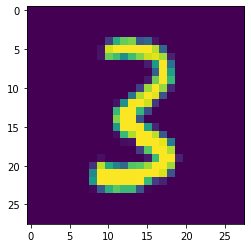

In [ ]:
plt.imshow(xb[0].view(28,28))
yb[0]

In [ ]:
model,opt = get_model()

In [ ]:
def fit():
    for epoch in range(epochs):
        for xb,yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

In [ ]:
fit()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

(tensor(0.0277, grad_fn=<NllLossBackward>), tensor(1.))

### Random sampling

We want our training set to be in a random order, and that order should differ each iteration. But the validation set shouldn't be randomized.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3942)

In [ ]:
class Sampler():
    def __init__(self, ds, bs, shuffle=False):
        self.n,self.bs,self.shuffle = len(ds),bs,shuffle
        
    def __iter__(self):
        self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
        for i in range(0, self.n, self.bs): yield self.idxs[i:i+self.bs]

In [ ]:
small_ds = Dataset(*train_ds[:10])

In [ ]:
s = Sampler(small_ds,3,False)
[o for o in s]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [ ]:
s = Sampler(small_ds,3,True)
[o for o in s]

[tensor([2, 5, 1]), tensor([3, 0, 6]), tensor([7, 8, 4]), tensor([9])]

In [ ]:
def collate(b):
    xs,ys = zip(*b)
    return torch.stack(xs),torch.stack(ys)

class DataLoader():
    def __init__(self, ds, sampler, collate_fn=collate):
        self.ds,self.sampler,self.collate_fn = ds,sampler,collate_fn
        
    def __iter__(self):
        for s in self.sampler: yield self.collate_fn([self.ds[i] for i in s])

In [ ]:
train_samp = Sampler(train_ds, bs, shuffle=True)
valid_samp = Sampler(valid_ds, bs, shuffle=False)

In [ ]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)
valid_dl = DataLoader(valid_ds, sampler=valid_samp, collate_fn=collate)

tensor(3.)

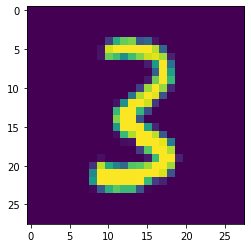

In [ ]:
xb,yb = next(iter(valid_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(4.)

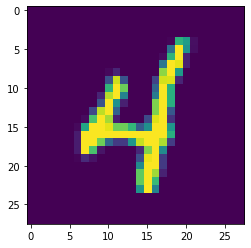

In [ ]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(9.)

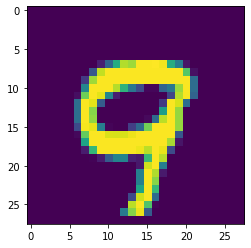

In [ ]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

In [ ]:
model,opt = get_model()
fit()

loss,acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

RuntimeError: ignored

### PyTorch DataLoader

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=4171)

In [ ]:
#export
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [ ]:
train_dl = DataLoader(train_ds, bs, sampler=RandomSampler(train_ds), collate_fn=collate)
valid_dl = DataLoader(valid_ds, bs, sampler=SequentialSampler(valid_ds), collate_fn=collate)

In [ ]:
model,opt = get_model()
fit()
loss_func(model(xb), yb), accuracy(model(xb), yb)

PyTorch's defaults work fine for most things however:

In [ ]:
train_dl = DataLoader(train_ds, bs, shuffle=True, drop_last=True)
valid_dl = DataLoader(valid_ds, bs, shuffle=False)

In [ ]:
model,opt = get_model()
fit()

loss,acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

Note that PyTorch's `DataLoader`, if you pass `num_workers`, will use multiple threads to call your `Dataset`.

## Validation

You **always** should also have a [validation set](http://www.fast.ai/2017/11/13/validation-sets/), in order to identify if you are overfitting.

We will calculate and print the validation loss at the end of each epoch.

(Note that we always call `model.train()` before training, and `model.eval()` before inference, because these are used by layers such as `nn.BatchNorm2d` and `nn.Dropout` to ensure appropriate behaviour for these different phases.)

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=4260)

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                pred = model(xb)
                tot_loss += loss_func(pred, yb.long())
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv

*Question*: Are these validation results correct if batch size varies?

`get_dls` returns dataloaders for the training and validation sets:

In [ ]:
#export
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

Now, our whole process of obtaining the data loaders and fitting the model can be run in 3 lines of code:

In [ ]:
train_dl,valid_dl = get_dls(train_ds, valid_ds, bs)
model,opt = get_model()
loss,acc = fit(5, model, loss_func, opt, train_dl, valid_dl)

In [ ]:
assert acc>0.9

## Export

In [ ]:
!python notebook2script.py 03_minibatch_training.ipynb